# 1) Importing the images - RGB histogram
In this exercise I used the matplotlib library to improt images, so the first step is to import these packages.

In [ ]:
import numpy as np   # 'import numpy as np' is my favorite line
import cv2 as cv  # used for color correction & histogram
from google.colab.patches import cv2_imshow   # used to show the images
from skimage import io  # I used io.imread() to import images from URLs
import matplotlib.pylab as plt # plt is used to plot histograms

An example to the imports:
as it is complicated to upload images to the google colab, I used urls to refer to the images. Within a for loop all the images can be imported and printed as shown below:

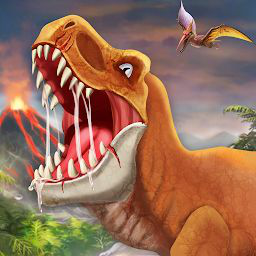

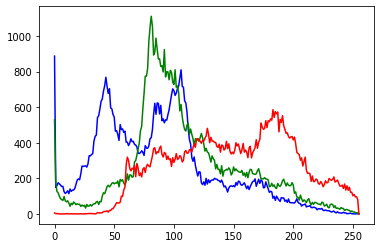

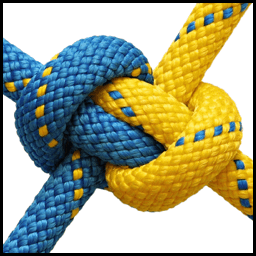

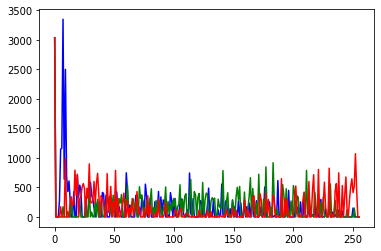

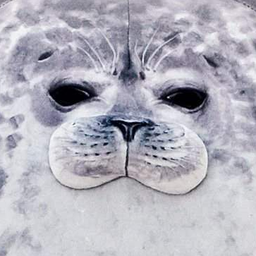

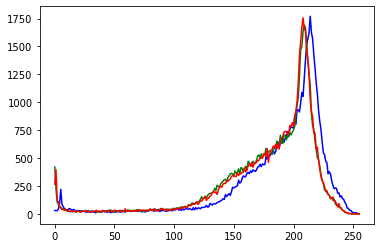

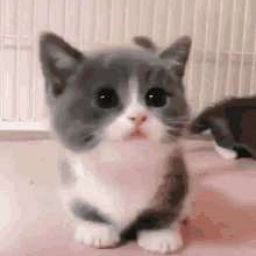

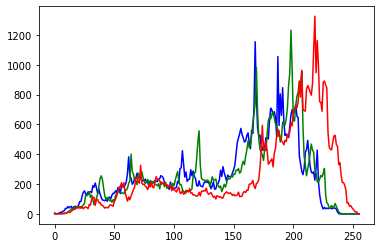

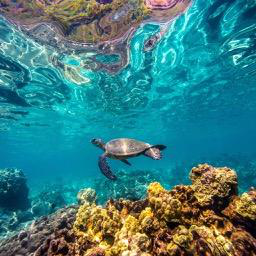

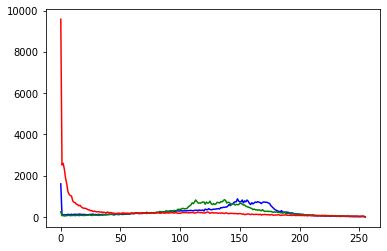

In [ ]:
urls = ["https://i.pinimg.com/474x/89/f1/f1/89f1f10773de2be968b38bc9160df831.jpg","https://www.hydrexkft.hu/assets/images/hydrex-kotel-1-256x256.png", "https://styles.redditmedia.com/t5_26eipj/styles/communityIcon_7w9dppthn5s31.png", "https://i.pinimg.com/550x/88/d8/c1/88d8c1af2013deb36771fa7d7d0ce8f2.jpg", "https://cdn.shopify.com/s/files/1/0268/4069/4838/products/ds_1of1_-6_75b54547-55d0-4857-919a-22dfc38496d5_480x480.jpg?v=1589338106"]

for url in urls:
  # Importing the pictures from the URLs
  image = io.imread(url)

  # This function is for color correction
  images=cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(images)

  # RGB Histogram: first let's define the RGB array
  color=('b','g','r')

  for i,col in enumerate(color):
    # cv.calcHist(image, channel, mask ...) used to make the histograms
    hist=cv.calcHist([images],[i],None,[256],[0,255])
    # plotting the histograms
    plt.plot(hist,color=col)
  plt.show()
  print('\n')

# 2) Calculating the mean and standard deviaton of the pixels for the images

This was my first intention, but it was rather slow:

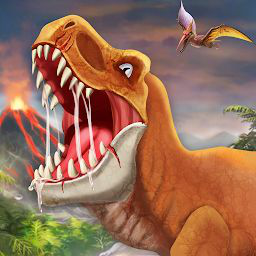

The mean of the Red-Green-Blue channels: (-1.3877787807814457e-17, 5.204170427930421e-18, -1.0408340855860843e-17)
The standard deviation of the Red-Green-Blue channels: 1.0, 0.9999999999999999, 0.9999999999999999)




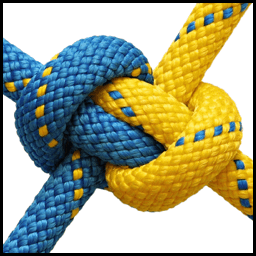

The mean of the Red-Green-Blue channels: (-9.71445146547012e-17, -4.163336342344337e-17, -6.938893903907228e-18)
The standard deviation of the Red-Green-Blue channels: 0.9999999999999999, 0.9999999999999999, 1.0)




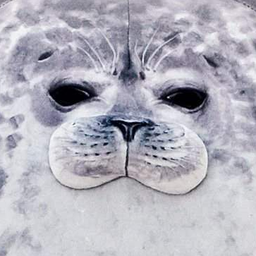

The mean of the Red-Green-Blue channels: (-2.7755575615628914e-17, -1.3877787807814457e-17, 0.0)
The standard deviation of the Red-Green-Blue channels: 1.0, 0.9999999999999999, 1.0)




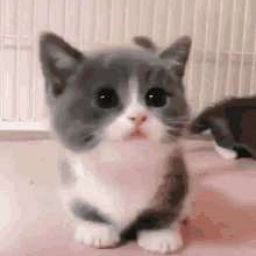

The mean of the Red-Green-Blue channels: (0.0, 1.734723475976807e-18, 1.0408340855860843e-17)
The standard deviation of the Red-Green-Blue channels: 1.0, 1.0, 1.0)




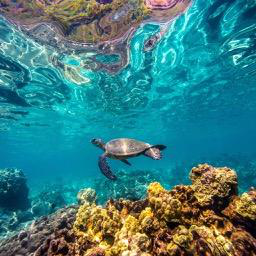

The mean of the Red-Green-Blue channels: (-5.551115123125783e-17, 1.3877787807814457e-17, -1.3877787807814457e-17)
The standard deviation of the Red-Green-Blue channels: 1.0, 0.9999999999999999, 1.0)




In [ ]:
for url in urls:
  Red = np.array([])
  Green = np.array([])
  Blue = np.array([])
  # Importing the pictures from the URLs
  image = io.imread(url)

  # This function is for color correction
  images=cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(images)

  # RGB Histogram: first let's define the RGB array
  for w in range(images.shape[0]):
    for h in range(images.shape[1]):
      Red = np.append(Red,images[w][h][0])
      Green = np.append(Green, images[w][h][1])
      Blue = np.append(Blue, images[w][h][2])

  r_mean = np.mean(Red)
  r_std = np.std(Red)
  Red = (Red - r_mean )/ r_std

  g_mean = np.mean(Green)
  g_std = np.std(Green)
  Green = (Green - g_mean)/g_std

  b_mean = np.mean(Blue)
  b_std = np.std(Blue)
  Blue = (Blue - b_mean)/b_std

  print("The mean of the Red-Green-Blue channels: (" + str(np.mean(Red)) + ", " + str(np.mean(Green))+ ", " + str(np.mean(Blue)) + ")")
  print("The standard deviation of the Red-Green-Blue channels: " + str(np.std(Red)) + ", " + str(np.std(Green))+ ", " + str(np.std(Blue))+ ")")

  print('\n')

Another way to do this task (and also to do this faster)

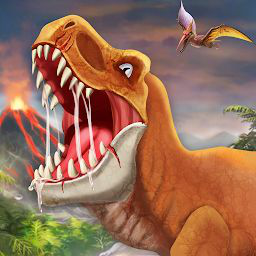

The mean of the Red-Green-Blue channels: (-1.3877787807814457e-17, -1.3877787807814457e-17, -1.3877787807814457e-17)
The standard deviation of the Red-Green-Blue channels: 1.0, 1.0, 1.0)




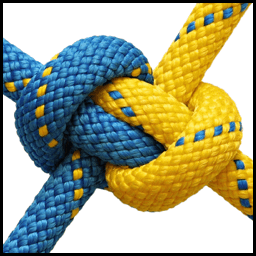

The mean of the Red-Green-Blue channels: (-9.71445146547012e-17, -9.71445146547012e-17, -9.71445146547012e-17)
The standard deviation of the Red-Green-Blue channels: 0.9999999999999999, 0.9999999999999999, 0.9999999999999999)




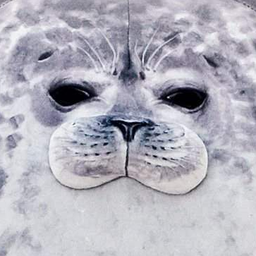

The mean of the Red-Green-Blue channels: (-2.7755575615628914e-17, -2.7755575615628914e-17, -2.7755575615628914e-17)
The standard deviation of the Red-Green-Blue channels: 1.0, 1.0, 1.0)




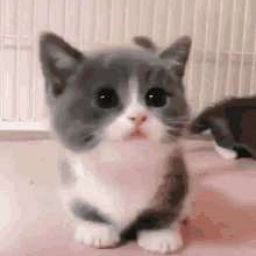

The mean of the Red-Green-Blue channels: (0.0, 0.0, 0.0)
The standard deviation of the Red-Green-Blue channels: 1.0, 1.0, 1.0)




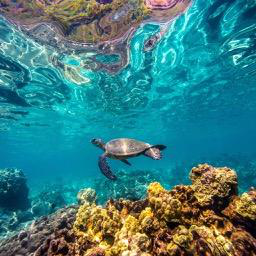

The mean of the Red-Green-Blue channels: (-5.551115123125783e-17, -5.551115123125783e-17, -5.551115123125783e-17)
The standard deviation of the Red-Green-Blue channels: 1.0, 1.0, 1.0)




In [ ]:
for url in urls:
  Red = np.array([])
  Green = np.array([])
  Blue = np.array([])
  # Importing the pictures from the URLs
  image = io.imread(url)

  # This function is for color correction
  images=cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(images)

  # RGB Histogram: first let's define the RGB array
  Red = images[:, :, 0]
  Green = images[:, :, 0]
  Blue = images[:, :, 0]

  # This is how I changed the mean and the std /based on the slides from 
  r_mean = np.mean(Red)
  r_std = np.std(Red)
  Red = (Red - r_mean )/ r_std

  g_mean = np.mean(Green)
  g_std = np.std(Green)
  Green = (Green - g_mean)/g_std

  b_mean = np.mean(Blue)
  b_std = np.std(Blue)
  Blue = (Blue - b_mean)/b_std

  print("The mean of the Red-Green-Blue channels: (" + str(np.mean(Red)) + ", " + str(np.mean(Green))+ ", " + str(np.mean(Blue)) + ")")
  print("The standard deviation of the Red-Green-Blue channels: " + str(np.std(Red)) + ", " + str(np.std(Green))+ ", " + str(np.std(Blue))+ ")")

  print('\n')

# 3) Importing audio files

In [ ]:
# I used this library to import the audiofile
import scipy.io.wavfile as wavfile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


[[0 0]
 [5 5]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


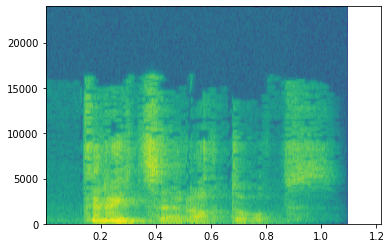

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: WavFileWarning: Chunk (non-data) not understood, skipping it.
  from ipykernel import kernelapp as app


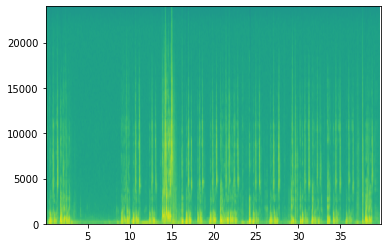

In [ ]:
# Improting the audio file:
Fs, aud1 = wavfile.read('triceratopsz.wav')

# This wav file is represented as an array of two dimensional vectors which contain
# the audio from the left and the right channel:
print(aud1)

# To make a histogram we have to select a channel - I chose the left:
aud1 = aud1[:, 0]

# The spectogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud1, Fs=Fs)
plt.show()

Fs, aud2 = wavfile.read('brontoszaurusz.wav')
aud2 = aud2[:, 0]

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud2, Fs=Fs)
plt.show()

# 4) The standardization of data
This is practically the same as seen in the second exercise.

In [ ]:
aud1 = (aud1 - np.mean(aud1)) / np.std(aud1)
print("The mean for the data of the spectogram: " + str(np.mean(aud1)) + " and the standard deviation: " + str(np.std(aud1)))

aud2 = (aud2 - np.mean(aud2)) / np.std(aud2)
print("The mean for the data of the spectogram: " + str(np.mean(aud2)) + " and the standard deviation: " + str(np.std(aud2)))

The mean for the data of the spectogram: -5.021769684263013e-18 and the standard deviation: 1.0
The mean for the data of the spectogram: 1.1380358681302892e-17 and the standard deviation: 1.0


# 5) Downloading the text from a website

In [8]:
import requests
from bs4 import BeautifulSoup

# Getting the text from webpage

url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"
res = requests.get(url)
page = res.content
soup = BeautifulSoup(page, 'html.parser')

text=soup.find_all(text=True)

#filtered text
f_text =''

# This involves a lit of text which should not be involved in the histrogram
# soup collects a text with the html parent names, this is what we can blacklist out.
blacklist=[
    '[document]',
    'noscript',
    'header',
    'html',
    'href'
    'meta',
    'head', 
    'input',
    'script',
    'style',
]

for i in text:
    if i.parent.name not in blacklist:
        if i != '\n' and i !='\t':
            f_text += '{} '.format(i)

# Finally we should lower the text, because the char 'A' and 'a' are not the same:
f_text=f_text.lower()

# The text printed below:
print(f_text)

deep learning a gyakorlatban python és lua alapon - vitmav45 | smartlab, bme tmit === header ===  logo   end logo   topbar  languages magyar english  end topbar   toggle get grouped for better mobile display  menü be/kikapcsolás  end toggle  /end container  collect the nav links, forms, and other content for toggling   rólunk  
                            rólunk
                         laborunkról munkatársaink média megjelenések  end rólunk   megoldásaink  
                            megoldásaink
                         profivox magyar nyelvű felolvasó (korpuszos) profivox magyar nyelvű felolvasó (dnn) profivox magyar nyelvű felolvasó (hmm) profivox magyar nyelvű felolvasó (diádos,triádos) strokeaid alkalmazások jaws for windows integráció időjárás mindenkinek (magyar, windows 8) aalfred (5 nyelven, windows 8.1) robobraille beszélő atm-ek li><a href="alkalmazas-weather-for-all">weather for all (5 nyelven, windows 8.1)</a></li gyógyszervonal (ogyi) li><a href="alkalmazas-sms-es-emai

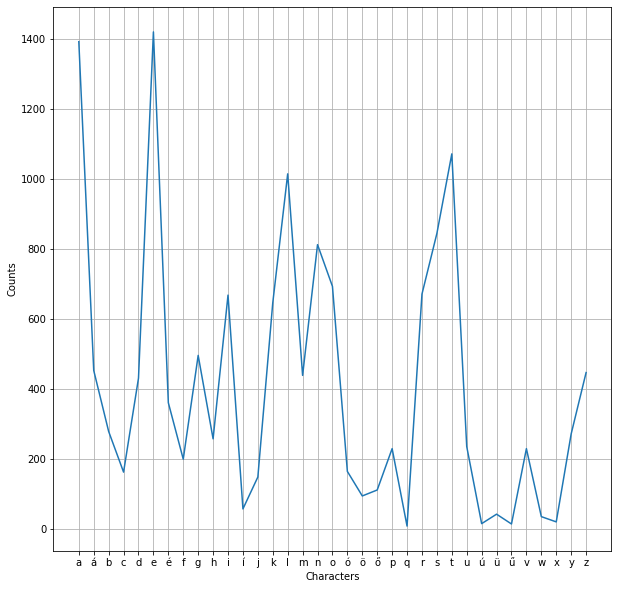

In [12]:
# A list of the characters in the Hungarian alphabet:
char= ["a", "á","b", "c", "d", "e", "é" , "f" , "g", "h", "i", "í", "j", "k", "l", "m", "n", "o", "ó", "ö", "ő", "p", "q", "r", "s", "t", "u", "ú", "ü", "ű", "v", "w", "x", "y", "z"]

# Basic histogram
frec=[]
for i in range(len(char)):
    x =f_text.count(char[i])
    frec.append(x)
    
plt.figure(figsize=(10,10))   # Enlarge the figure
plt.plot(char, frec)
plt.xlabel('Characters')
plt.ylabel('Counts')
plt.grid()
plt.show()
